In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from astropy.table import Table
import numpy as np
import pandas as pd
import seaborn as sns
import vaex

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.mixture import GaussianMixture as gmm
#from sklearn import svm

sns.set(style='white', font_scale=1.2)

In [7]:
filters = 'UGRIZ'

def convert(table):
    t = Table(np.load(table))
    # loop over columns and extract data from each 5d column
    for c in t.colnames:
        if len(t[c].shape) > 1:
            if t[c].shape[-1] == 5:
                for i,f in enumerate(filters):
                    # name each new column <FILTER>_<ORIGINAL COLNAME>
                    t['{}_{}'.format(f,c)] = t[c][:,i]
            # delete 5d column
            t.remove_column(c)
    # convert to hdf5
    t.to_pandas().to_hdf(table.replace('.npy','.hdf5'), key='data', mode='w',
                         complevel=9, complib='zlib', format='table')
    print('Converted {}'.format(table))

In [8]:
convert('hlc_nsc_sdss_stars_matches.npy')
convert('hlc_nsc_sdss_qso_matches.npy')

Converted hlc_nsc_sdss_qso_matches.npy


In [35]:
df = pd.read_hdf('hlc_nsc_sdss_qso_matches.hdf5', key='data')
for filt in 'ugriz':
    df['{}_HLC_dereddened'.format(filt)] = df['HLC{}mag'.format(filt)] - df['{}_HLC_REDDENING'.format(filt.upper())]
df = df.assign(HLC_u_g = df.u_HLC_dereddened-df.g_HLC_dereddened)
df = df.assign(HLC_g_r = df.g_HLC_dereddened-df.r_HLC_dereddened)
df = df.assign(HLC_r_i = df.r_HLC_dereddened-df.i_HLC_dereddened)
df = df.assign(HLC_i_z = df.i_HLC_dereddened-df.z_HLC_dereddened)
df.to_hdf('hlc_nsc_sdss_qso_matches.hdf5', key='data', mode='w',
          complevel=9, complib='zlib', format='table')

In [36]:
df = pd.read_hdf('hlc_nsc_sdss_stars_matches.hdf5', key='data')
for filt in 'ugriz':
    df['{}_HLC_dereddened'.format(filt)] = df['HLC{}mag'.format(filt)] - df['{}_HLC_REDDENING'.format(filt.upper())]
df = df.assign(HLC_u_g = df.u_HLC_dereddened-df.g_HLC_dereddened)
df = df.assign(HLC_g_r = df.g_HLC_dereddened-df.r_HLC_dereddened)
df = df.assign(HLC_r_i = df.r_HLC_dereddened-df.i_HLC_dereddened)
df = df.assign(HLC_i_z = df.i_HLC_dereddened-df.z_HLC_dereddened)
df.to_hdf('hlc_nsc_sdss_stars_matches.hdf5', key='data', mode='w',
          complevel=9, complib='zlib', format='table')

In [27]:
df = pd.concat([pd.read_hdf('hlc_nsc_sdss_qso_matches.hdf5', key='data'),
                pd.read_hdf('hlc_nsc_sdss_stars_matches.hdf5', key='data')],
              ignore_index=True)

In [29]:
ds = vaex.from_pandas(df)

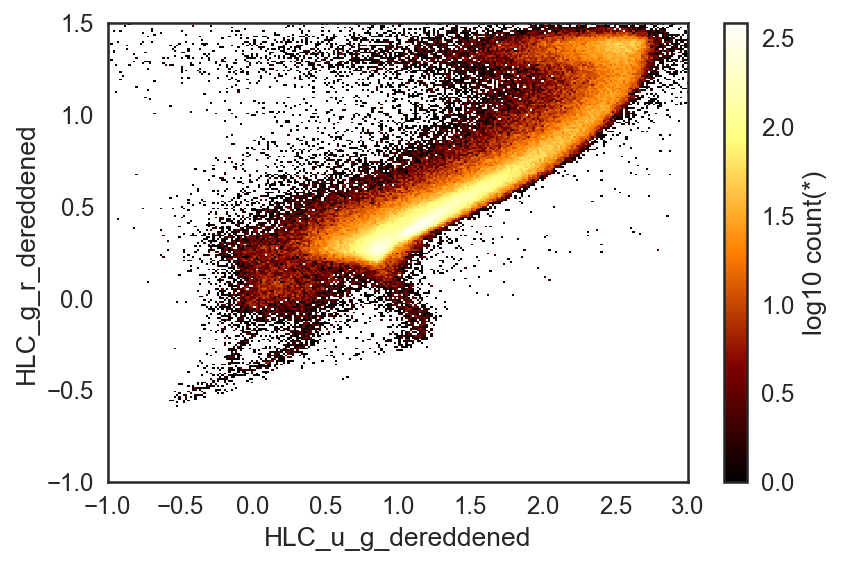

In [30]:
ds.plot('HLC_u_g','HLC_g_r', limits=[[-1,3],[-1,1.5]], f='log10')

In [31]:
df.to_hdf('hlc_nsc_sdss_star_qso_matches_dereddened.hdf5', key='data', mode='w',
          complevel=9, complib='zlib', format='table')